In [4]:
# Steps
#1. Import the necessary libraries.
#2. Imort the dataset.
# 3. Data Cleaning, Data Exploration, Data Visualization, Data Manipulation.
#4. EDA - Exploratory Data Analysis.
#5. Split the dataset into training and testing sets.
#6. Build the model(Choosing).
#7. Train the model.
#8. Test the model.
#9. Evaluate the model.
#10. [Optional] Export the dataset into a CSV file.


In [5]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
df.shape

(18981, 7)

In [11]:
df.drop(['GrossPay'], axis=1, inplace=True)


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

 Name           0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18911 non-null  object
 1   JobTitle      18911 non-null  object
 2   AgencyID      18911 non-null  object
 3   Agency        18911 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18911 non-null  object
dtypes: object(6)
memory usage: 1.0+ MB


In [15]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary
count,18911,18911,18911,18911,18911,18911
unique,18718,1073,1177,65,4737,1590
top,"Clark,Tony C",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00
freq,2,4817,316,4323,1478,4811


In [16]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary'], dtype='object')

In [17]:
#Making a copy of the dataset
new_df = df.copy()

In [18]:
#Removing from the leading and trailing spaces and converting to lower case
new_df.columns = new_df.columns.str.strip().str.lower()

In [19]:
new_df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary'], dtype='object')

In [20]:
new_df.agencyid

0        W02200
1        A03031
2        A29005
3        A65026
4        A99416
          ...  
18976    W02235
18977    W02629
18978    A99416
18979    A99262
18980    A50206
Name: agencyid, Length: 18911, dtype: object

In [21]:
new_df.agencyid.unique()

array(['W02200', 'A03031', 'A29005', ..., 'W02674', 'W02382', 'W02339'],
      dtype=object)

In [22]:
new_df['agencyid'].value_counts()

agencyid
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02685      1
W02660      1
W02692      1
W02447      1
W02339      1
Name: count, Length: 1177, dtype: int64

In [23]:
new_df['agencyid'].unique()

array(['W02200', 'A03031', 'A29005', ..., 'W02674', 'W02382', 'W02339'],
      dtype=object)

In [24]:
new_df.agencyid.value_counts().map(new_df.agency)

agencyid
P04001    HLTH-Health Department 
C90786             Youth Summer  
W02629         Police Department 
P04002           DPW-Solid Waste 
A99416             Youth Summer  
                   ...           
W02685        OED-Employment Dev 
W02660        OED-Employment Dev 
W02692        OED-Employment Dev 
W02447        OED-Employment Dev 
W02339        OED-Employment Dev 
Name: count, Length: 1177, dtype: object

In [31]:

# print name of agency for each agencyid unique value
for agency_id in new_df.agencyid.unique():
    agency_names = new_df[new_df['agencyid'] == agency_id]['agency'].unique()
    print(f"Agency ID: {agency_id}, Agency Name(s): {agency_names}")

Agency ID: W02200, Agency Name(s): ['Youth Summer  ']
Agency ID: A03031, Agency Name(s): ['OED-Employment Dev ']
Agency ID: A29005, Agency Name(s): ['States Attorneys Office ']
Agency ID: A65026, Agency Name(s): ['HLTH-Health Department ']
Agency ID: A99416, Agency Name(s): ['Police Department ']
Agency ID: A40001, Agency Name(s): ['M-R Info Technology ']
Agency ID: A64120, Agency Name(s): ['Fire Department ']
Agency ID: A99127, Agency Name(s): ['Police Department ']
Agency ID: A38410, Agency Name(s): ["Sheriff's Office "]
Agency ID: W02097, Agency Name(s): ['Youth Summer  ']
Agency ID: A06009, Agency Name(s): ['Housing & Community Dev ']
Agency ID: A75054, Agency Name(s): ['Enoch Pratt Free Library ']
Agency ID: W02185, Agency Name(s): ['Youth Summer  ']
Agency ID: A06015, Agency Name(s): ['Housing & Community Dev ']
Agency ID: A85301, Agency Name(s): ['General Services ']
Agency ID: A06004, Agency Name(s): ['Housing & Community Dev ']
Agency ID: A40301, Agency Name(s): ['M-R Info Tec

In [27]:
new_df[new_df['agencyid'] == 'W02526']['agency']

18134    Youth Summer  
Name: agency, dtype: object

In [32]:
new_df.jobtitle.value_counts()

jobtitle
AIDE BLUE CHIP                   4817
POLICE OFFICER                   1866
LABORER (Hourly)                  597
EMT Firefighter Suppression       358
CROSSING GUARD                    337
                                 ... 
HEALTH FACILITIES COORDINATOR       1
HYDRAULIC MECHANIC                  1
ZONING ADMINISTRATOR                1
LACTATION TECHNICIAN                1
Case Management Supervisor          1
Name: count, Length: 1073, dtype: int64

In [33]:
new_df.annualsalary.value_counts()

annualsalary
$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      162
              ... 
$39686.00        1
$64787.00        1
$55468.00        1
$101000.00       1
$77900.00        1
Name: count, Length: 1590, dtype: int64

In [44]:
# Removing the $ from the annualsalary column and converting it to float
#This line removes any dollar signs (`$`) and commas (`,`) from the `annualsalary` column in `new_df`, then converts the cleaned values to integers.
#  This ensures the `annualsalary` column contains numeric data instead of strings with currency formatting, making it suitable for analysis and modeling.
new_df['annualsalary'] = new_df['annualsalary'].replace({'^$': '', ',': ''}, regex=True).astype(int)

In [47]:
new_df.annualsalary

0        11310
1        53428
2        68300
3        62000
4        43999
         ...  
18976    11310
18977    11310
18978    43999
18979    44104
18980    53568
Name: annualsalary, Length: 18911, dtype: int64

In [49]:
new_df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999


In [45]:
new_df.annualsalary.value_counts()

annualsalary
11310     4811
20800      325
29245      196
43999      169
44773      162
          ... 
39686        1
64787        1
55468        1
101000       1
77900        1
Name: count, Length: 1590, dtype: int64

In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18911 non-null  object
 1   jobtitle      18911 non-null  object
 2   agencyid      18911 non-null  object
 3   agency        18911 non-null  object
 4   hiredate      18911 non-null  object
 5   annualsalary  18911 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


In [51]:
# make three separate columns for the hire date: hireday, hiremonth, hireyear (int)
hiredate_split = new_df['hiredate'].str.split('/', expand=True)
new_df['hiremonth'] = hiredate_split[0].astype(int)
new_df['hireday'] = hiredate_split[1].astype(int)
new_df['hireyear'] = hiredate_split[2].astype(int)

In [53]:
new_df.drop('hiredate', axis=1, inplace=True)

<Axes: ylabel='annualsalary'>

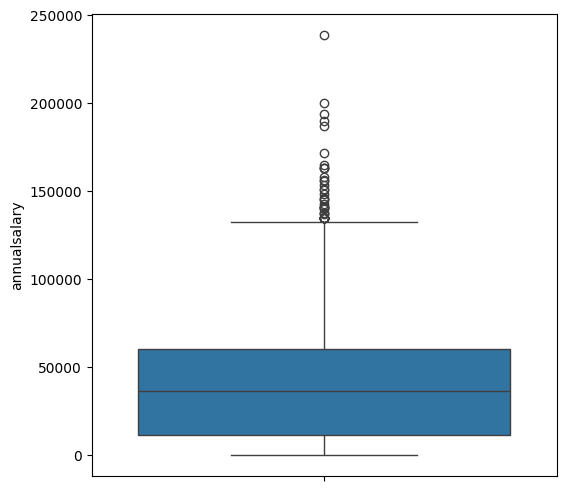

In [59]:
plt.figure(figsize=(6, 6))
sns.boxplot(y='annualsalary', data=new_df)


In [60]:
dumm = new_df.copy()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\2721720489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette='viridis')


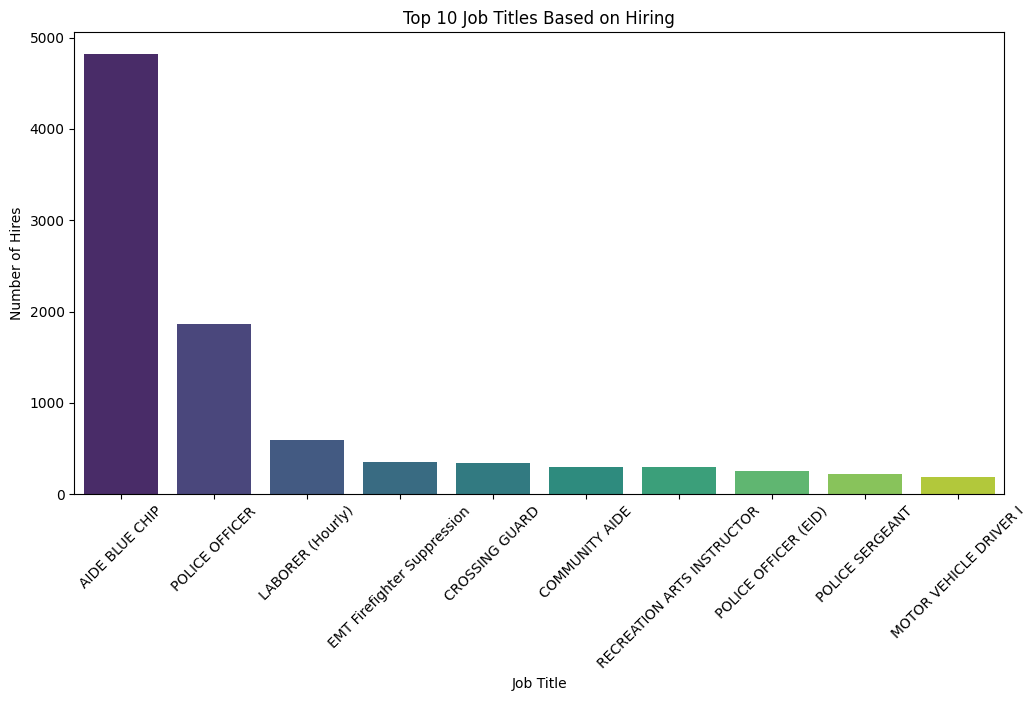

In [65]:
#plot Top 10 job based on hiring
top_10_jobs = dumm['jobtitle'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Job Titles Based on Hiring')
plt.xlabel('Job Title')
plt.ylabel('Number of Hires')
plt.show()


C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\3597683824.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_highest_salary.index, y=top_10_highest_salary.values, palette='viridis')


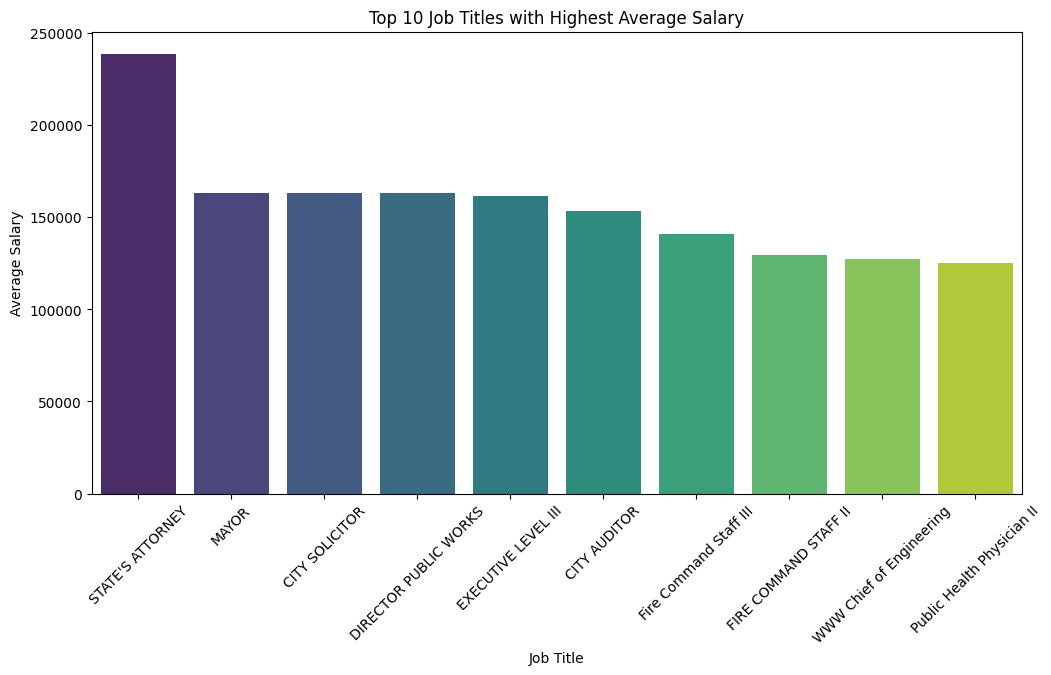

In [63]:
#plot 10 jobs with the highest salary
top_10_highest_salary = dumm.groupby('jobtitle')['annualsalary'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_highest_salary.index, y=top_10_highest_salary.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Job Titles with Highest Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

In [67]:
dumm.agency.value_counts()

agency
Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
M-R Labor Commissioner         6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\663532512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Highest_no_of_employees.index, y=Highest_no_of_employees.values, palette='viridis')


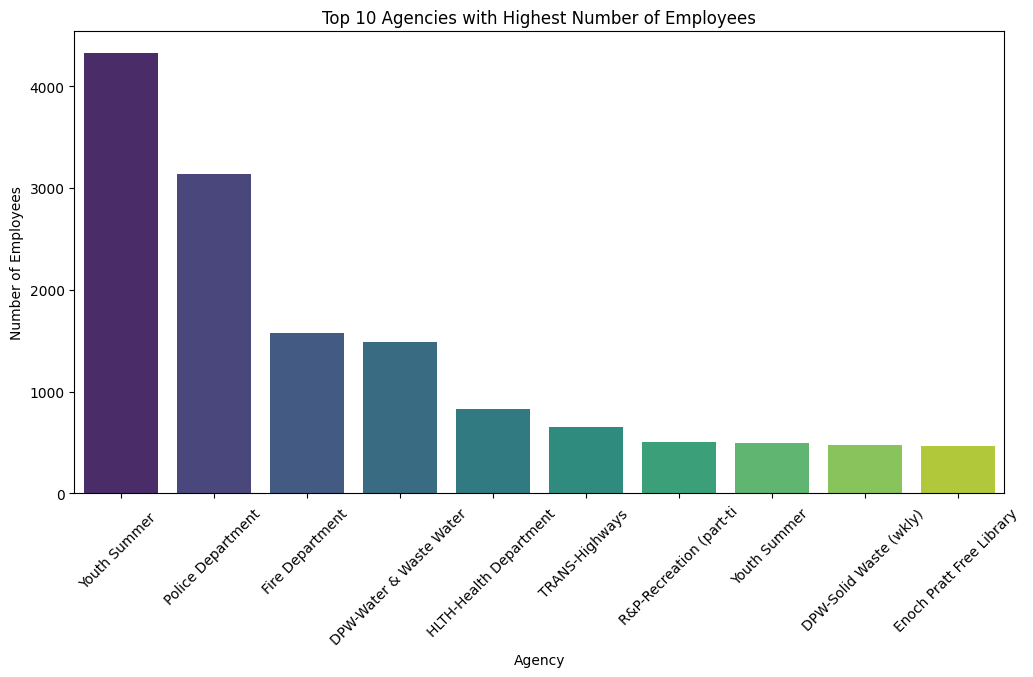

In [68]:
Highest_no_of_employees = dumm.agency.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=Highest_no_of_employees.index, y=Highest_no_of_employees.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Agencies with Highest Number of Employees')
plt.xlabel('Agency')
plt.ylabel('Number of Employees')
plt.show()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\670597148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_years.index.astype(str), y=top_10_years.values, palette='viridis')


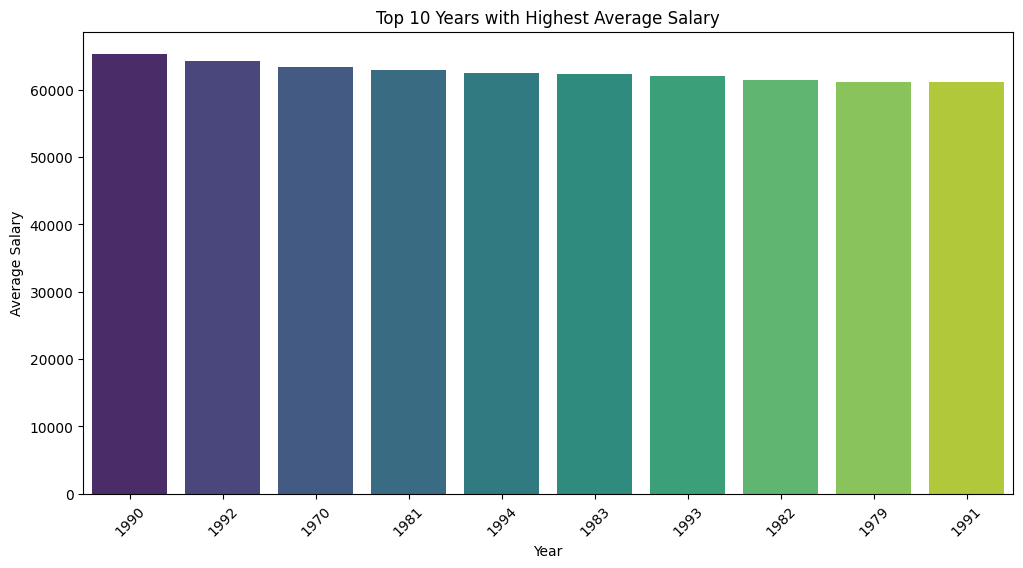

In [78]:
# Plot top 10 years with highest average salary
top_10_years = dumm.groupby('hireyear')['annualsalary'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index.astype(str), y=top_10_years.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Years with Highest Average Salary')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\3118091949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hireyear', y='annualsalary', data=dumm, palette='viridis')


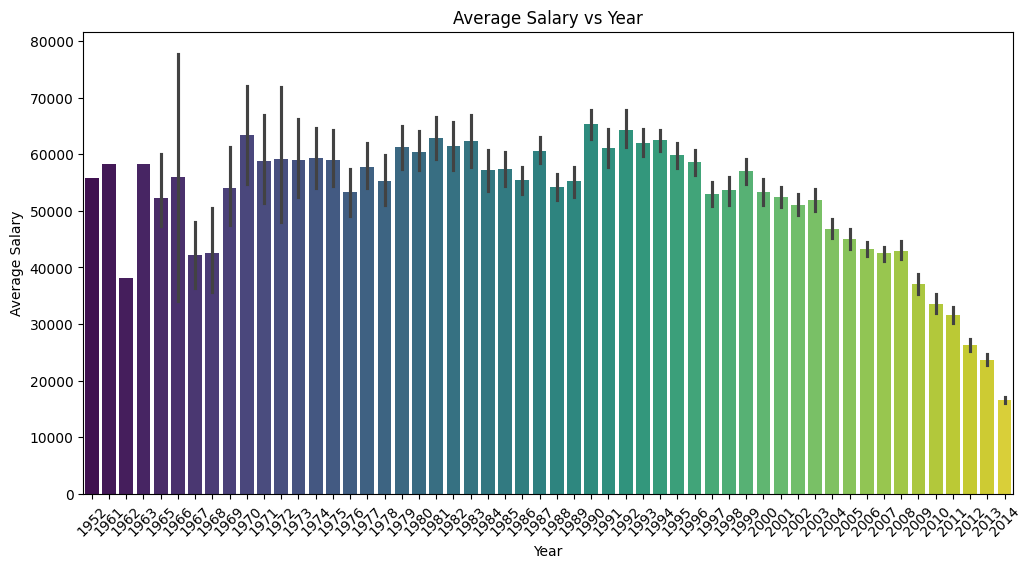

In [79]:
# Plot average salary vs year grsaph
plt.figure(figsize=(12, 6))
sns.barplot(x='hireyear', y='annualsalary', data=dumm, palette='viridis')
plt.title('Average Salary vs Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_10384\2213783037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hiremonth', y='annualsalary', data=dumm, palette='viridis')


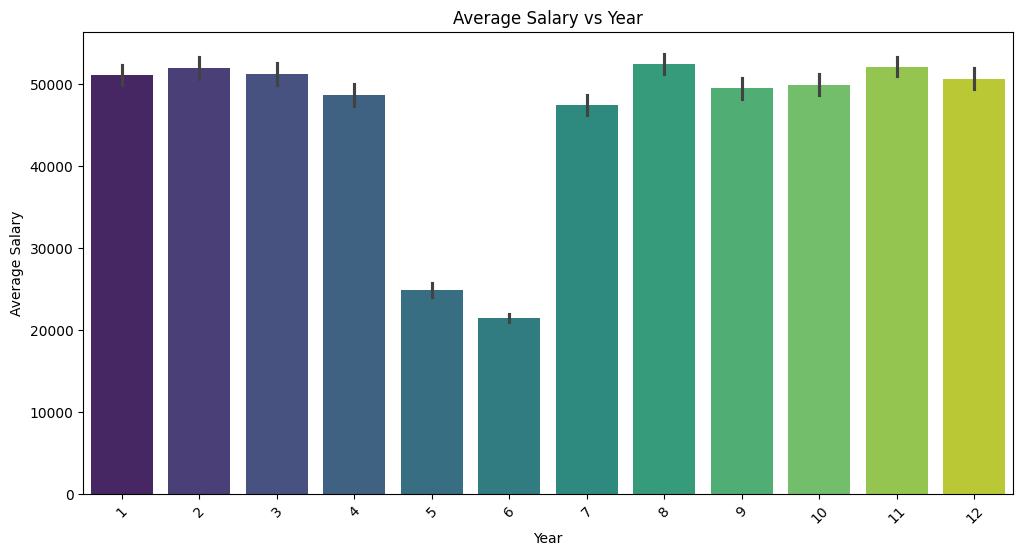

In [ ]:
# Plot a bar graph to check on which month the most employees were hired
plt.figure(figsize=(12, 6))
sns.barplot(x='hiremonth', y='annualsalary', data=dumm, palette='viridis')
plt.title('Average Salary vs Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

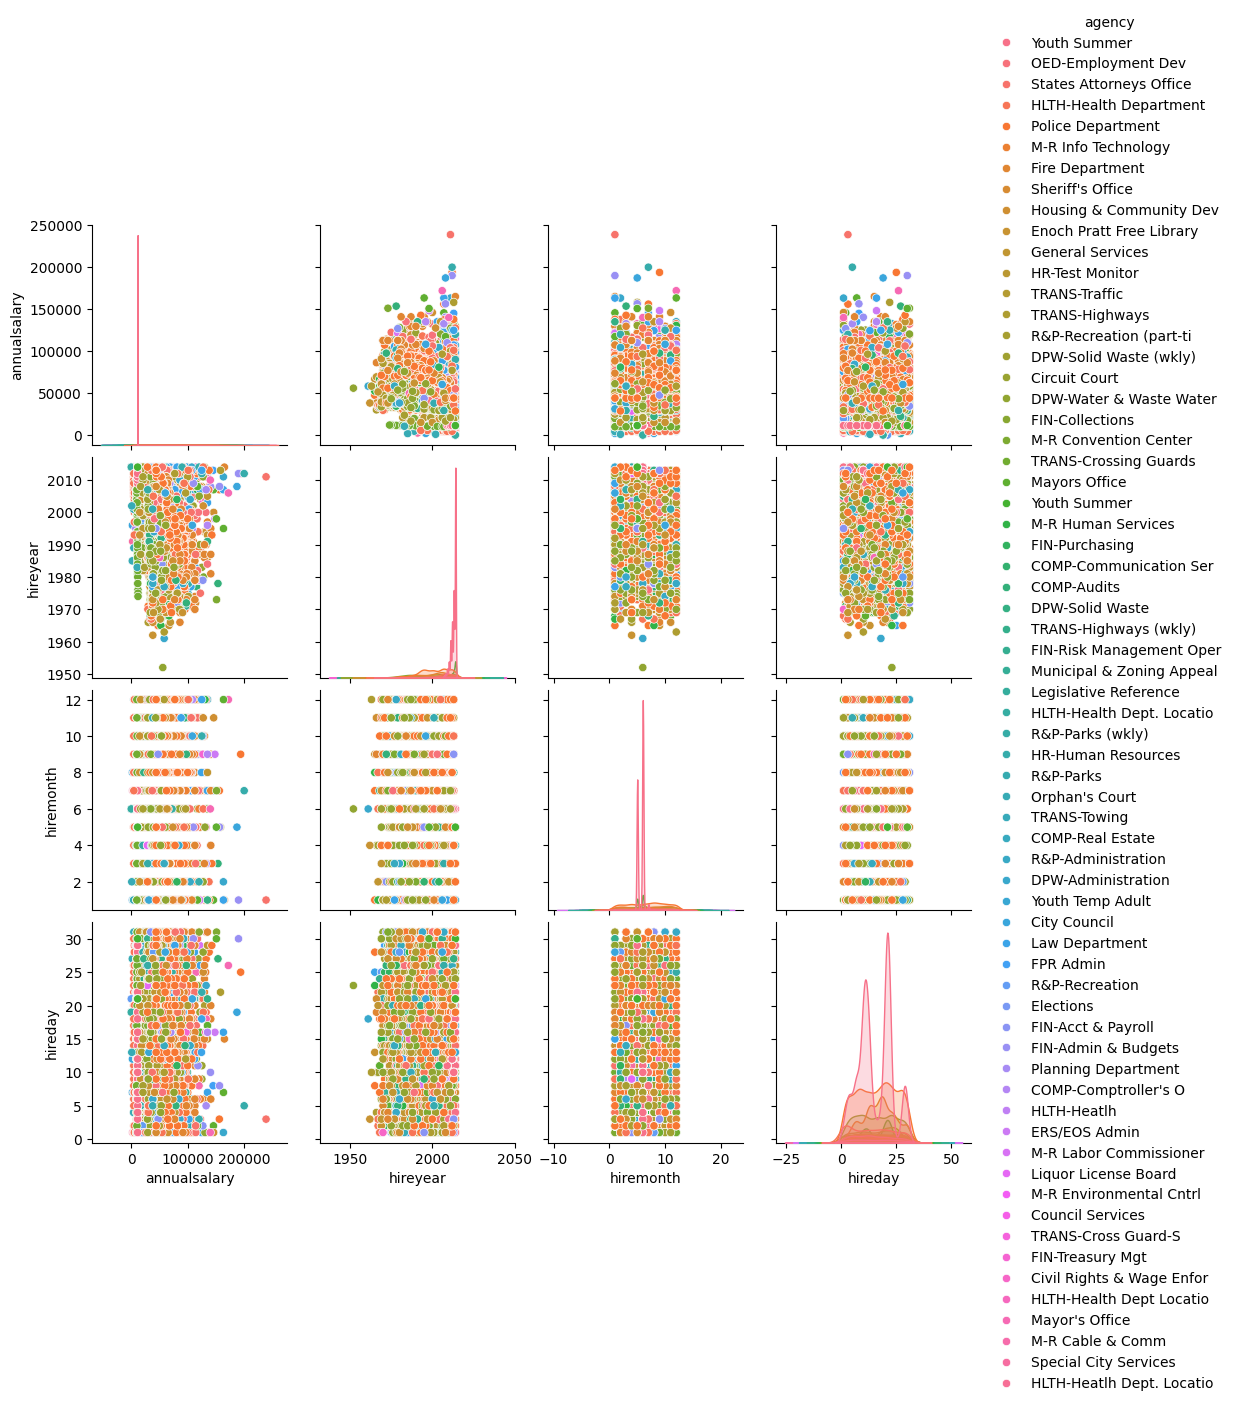

In [81]:
# plot a pairplot to check the correlation between the features
sns.pairplot(dumm, hue='agency', vars=['annualsalary', 'hireyear', 'hiremonth', 'hireday'])


C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


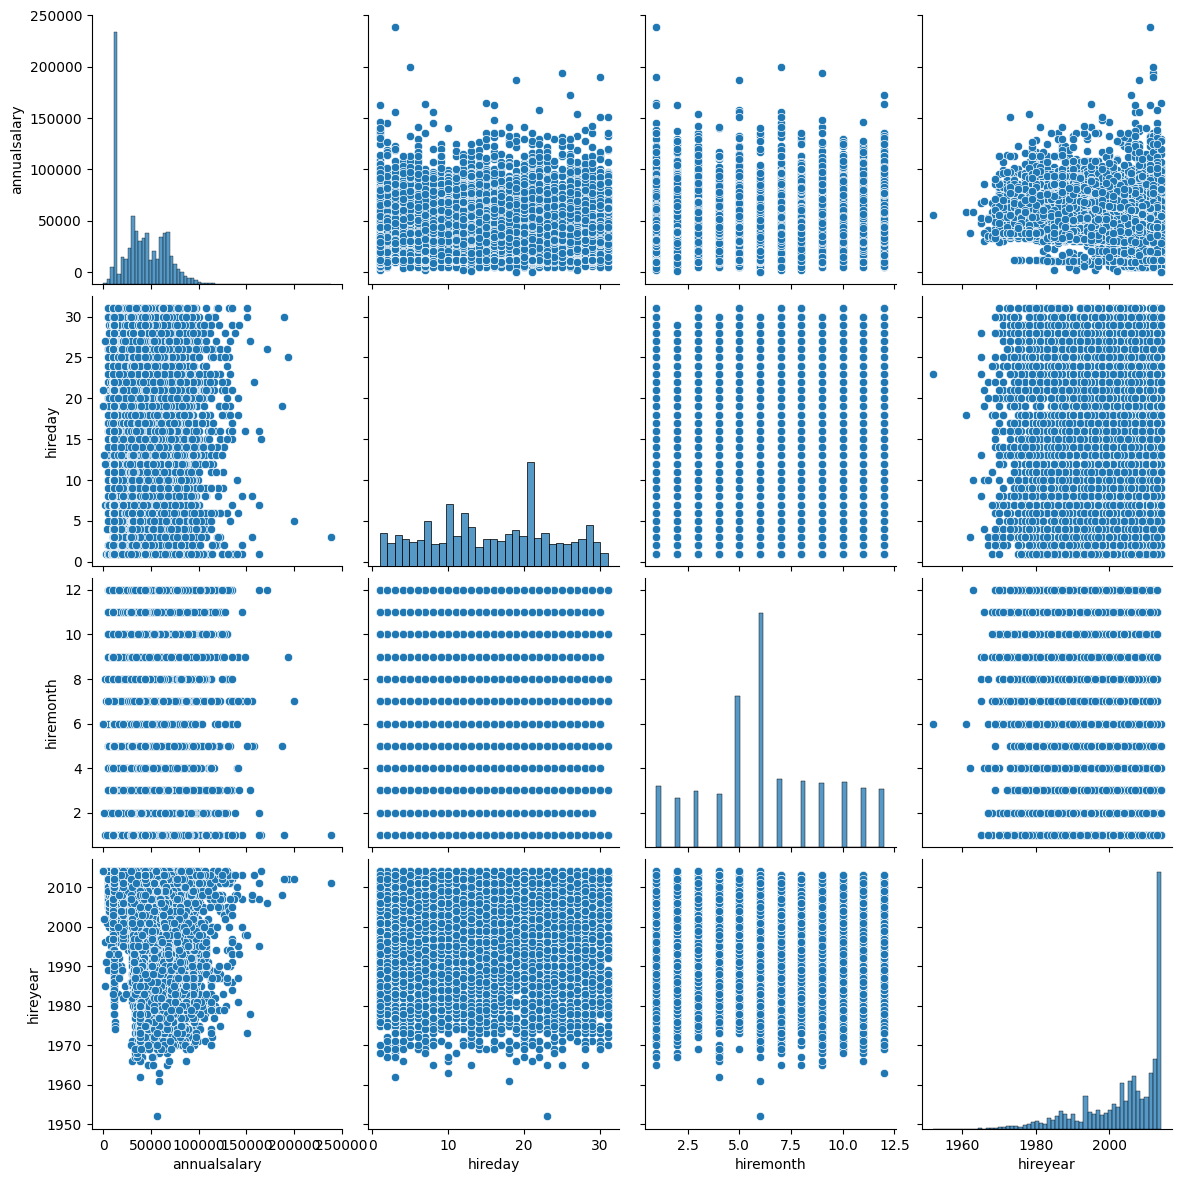

In [82]:
sns.pairplot(dumm, size=3)

<Axes: >

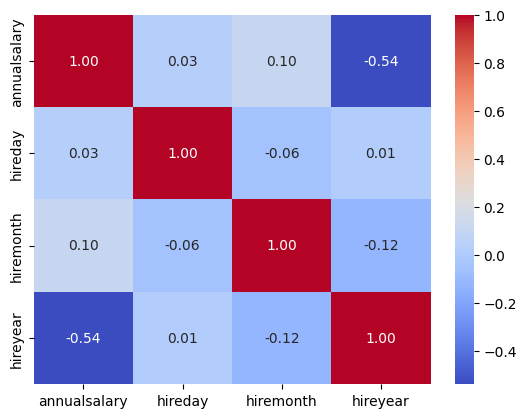

In [84]:
# Select only numeric columns for correlation
numeric_cols = dumm.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [97]:
dumm

,name,jobtitle,agencyid,agency,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,11310,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,53428,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,43999,24,7,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,11310,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,11310,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,43999,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,44104,23,1,2013


In [ ]:
# Machine Learning Model
#IF an Employee joins on the following date : 02/09/2018,04/04/2015, 21/12/2021, Predict the annual salary of the employee.
X = dumm[['hireday', 'hiremonth', 'hireyear']]
y = dumm['annualsalary']

In [99]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [100]:
# Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler

In [101]:

from sklearn.svm import SVR

In [102]:
X_train.shape

(15128, 3)

In [103]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [104]:
y_pred = model.predict(X_test)

In [105]:
y_pred

array([36295.87460195, 36296.64962375, 36297.34468857, ...,
       36295.77651986, 36297.73268884, 36296.26359116])

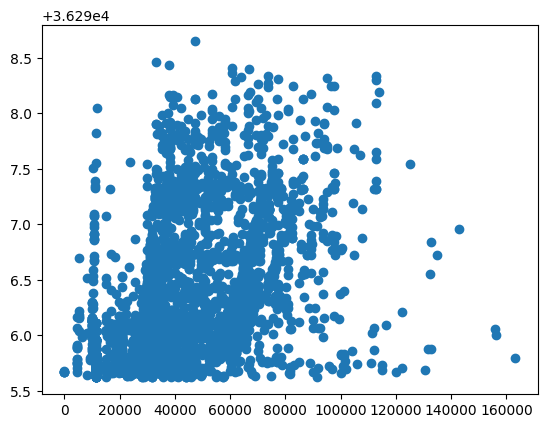

In [106]:
plt.scatter(y_test, y_pred)

In [109]:
#IF an Employee joins on the following date : 02/09/2018,04/04/2015, 21/12/2021, Predict the annual salary of the employee.
model.predict([[2, 9, 2018], [4, 4, 2015], [21, 12, 2021]])

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([36295.39729238, 36295.5685614 , 36295.27340929])

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'r2 score: {r2}')

Mean Squared Error: 635504518.7722379
Mean Absolute Error: 20776.891169905673
r2 score: -0.014165897785412662


In [111]:
# exporting the cleaned dataset to a CSV file
dumm.to_csv('cleaned_dataset.csv', index=False)